In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import h5py
import os
import cv2 as cv
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter, MovieWriter

In [3]:
np.__version__

'1.19.5'

In [3]:
# try seeing if there is any repeat in input
inputs = h5py.File('retina_input.h5', 'r')['photon']['data']
print(type(inputs))
inputs = np.array(inputs)

print('the origin input has shape of {}'.format(np.shape(inputs)))

difference = inputs[1000,:] -inputs[1002,:]
print(np.min(difference))
print(np.max(difference ))
print(difference)

#plt.matshow(inputs[1100,:] -inputs[1104,:])
#plt.show()

<class 'h5py._hl.dataset.Dataset'>
the origin input has shape of (800, 3666)


IndexError: index 1000 is out of bounds for axis 0 with size 800

NameError: name 'differece' is not defined

In [4]:
# read ommatidia coordinates
elevr1 = h5py.File('retina_elev.h5', 'r')['array']
print(elevr1)
azim1 = h5py.File('retina_azim.h5', 'r')['array']
r1 = 1
y1 = -r1 * np.cos(elevr1) * np.sin(azim1)
x1 = -r1 * np.cos(elevr1) * np.cos(azim1)
z1 = r1 * np.sin(elevr1)
print(f'x1 is of shape{np.shape(x1)}')

# read screen coordinates
elevr2 = h5py.File('grid_dima.h5', 'r')['array']
print(np.shape(elevr2))
azim2 = h5py.File('grid_dimb.h5', 'r')['array']
r2 = 10
y2 = -r2 * np.cos(elevr2) * np.sin(azim2)
x2 = -r2 * np.cos(elevr2) * np.cos(azim2)
z2 = r2 * np.sin(elevr2)
print(f'x2 is of shape{np.shape(x2)}')
print(f'x2 is of shape{np.shape(x2.reshape(-1, 1))}')

<HDF5 dataset "array": shape (611,), type "<f8">
x1 is of shape(611,)
(800, 50)
x2 is of shape(800, 50)
x2 is of shape(40000, 1)


In [5]:
inputs = h5py.File('retina_input.h5', 'r')['photon']['data']
inputs = np.array(inputs)
print('the origin input has shape of {}'.format(np.shape(inputs)))
#print(367 * 6)
#print(type(inputs))
inputs = inputs[::10, :]
outputs = h5py.File('retina_output0.h5', 'r')['V']['data']
outputs = np.array(outputs)
print('the origin output has shape of {}'.format(np.shape(outputs)))
outputs = outputs[::10, :]

R1_inputs = inputs[:, 0:-1:6]
R1_outputs = outputs[:, 0:-1:6]
#print(R1_outputs)
#print(type(R1_inputs))
#print(type(R1_outputs))

print(f'the cutted input has the shape {np.shape(inputs)}')
print(f'the R1 input has the shape {np.shape(R1_inputs)}')
print(f'the R1 output has the shape {np.shape(R1_outputs)}')
#plt.matshow(R1_outputs)
#plt.show()

the origin input has shape of (5000, 3666)
the origin output has shape of (5000, 3666)
the cutted input has the shape (500, 3666)
the R1 input has the shape (500, 611)
the R1 output has the shape (500, 611)


(500, 800, 50)


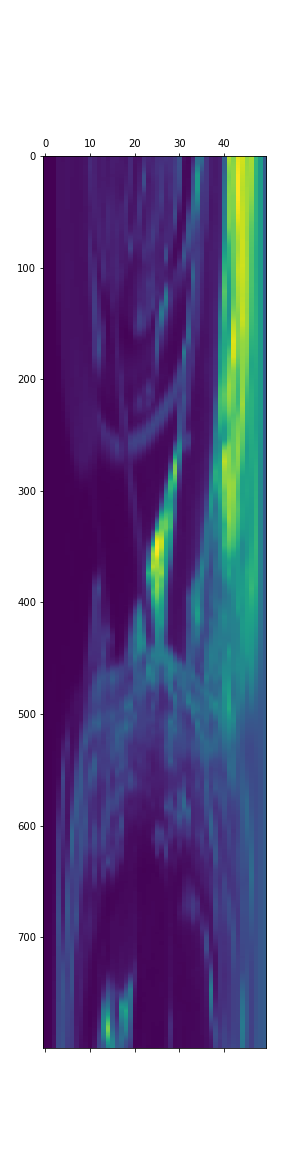

'\nfor i in range(49):\n    plt.matshow(screen[:, :, i], aspect="auto")\n    plt.show()\n'

In [6]:
# here is a modest test of screen

screen = h5py.File('intensities.h5', 'r')['array']
print(np.shape(screen))
plt.matshow(screen[40, :, :], aspect="auto")
plt.show()
'''
for i in range(49):
    plt.matshow(screen[:, :, i], aspect="auto")
    plt.show()
'''

(40, 40)
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.75 -4.75 -4.75 ... -4.75 -4.75 -4.75]
 [-4.5  -4.5  -4.5  ... -4.5  -4.5  -4.5 ]
 ...
 [ 4.25  4.25  4.25 ...  4.25  4.25  4.25]
 [ 4.5   4.5   4.5  ...  4.5   4.5   4.5 ]
 [ 4.75  4.75  4.75 ...  4.75  4.75  4.75]]


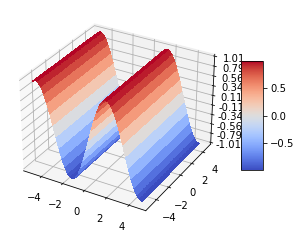

In [48]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(X)
print(np.shape(X))
print(Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

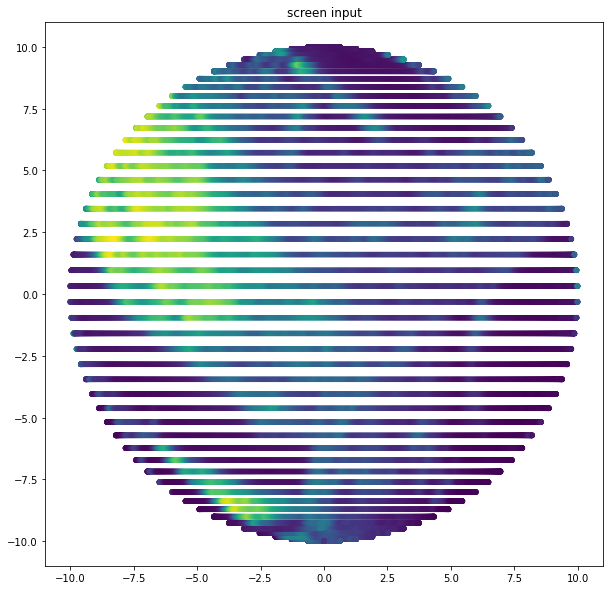

In [59]:
%matplotlib inline
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

fig, ax = plt.subplots(figsize=(10, 10))

#print(np.shape(R1_inputs[90, :]))
ax.scatter(x2.reshape(-1, 1),z2.reshape(-1, 1), c=screen[10, :, :].reshape(-1, 1), s=20 )
# Plot the surface.


plt.title('screen input')
plt.show()

/apps/miniconda/envs/ffbo/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


<Figure size 2160x2160 with 0 Axes>

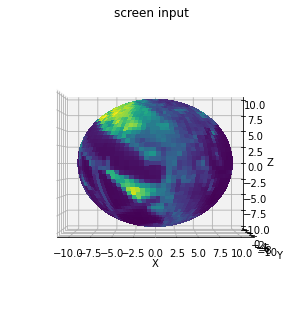

In [50]:
%matplotlib inline
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.figure(figsize=(30, 30))
fig = plt.figure()
ax = Axes3D(fig)
C = screen[40,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
# Plot the surface.
surf = ax.plot_surface(x2,y2, z2, facecolors= C_colored, cmap='plasma',
                       linewidth=0, antialiased=False)
#surf = ax.plot_surface(x2.reshape(-1, 1)[0],y2.reshape(-1, 1)[0], z2.reshape(-1, 1)[0], cmap='plasma',
#                       linewidth=0, antialiased=False)
ax.set_xlabel('X')

#ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

#ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')
ax.view_init(azim=-90,  elev=0)
plt.title('screen input')
plt.show()

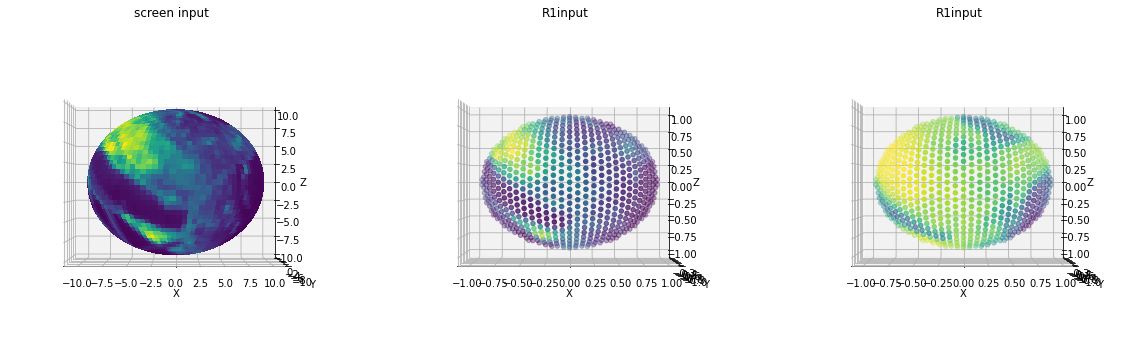

In [9]:
# show screen input, R1 input, R1 output in the same time
frame_number = 400
frame_number_R = int(400/10)
frame_number_screen = int(frame_number/10)

fig = plt.figure(figsize=(20, 20))
ax_screen_input = fig.add_subplot(1, 3, 1, projection='3d')
#ax = Axes3D(fig)
C = screen[frame_number_screen,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
# Plot the surface.
surf = ax_screen_input.plot_surface(x2, y2, z2, facecolors= C_colored, cmap='gray',
                       linewidth=0, antialiased=False)
#ax_screen_input.scatter3D(x2, y2, z2, c= C_colored)
ax_screen_input.set_xlabel('X')
ax_screen_input.set_ylabel('Y')
ax_screen_input.set_zlabel('Z')
ax_screen_input.set_title('screen input')
ax_screen_input.view_init(azim=-90,  elev=0)

ax_R1_input = fig.add_subplot(1, 3, 2, projection='3d')
#print(np.shape(R1_inputs[90, :]))
ax_R1_input.scatter3D(x1, y1,z1, c=R1_inputs[frame_number_R, :])
#ax_R1_input.plot_surface(x1, y1,z1, facecolors=R1_inputs[frame_number_R, :])
ax_R1_input.set_xlabel('X')
ax_R1_input.set_ylabel('Y')
ax_R1_input.set_zlabel('Z')
ax_R1_input.set_title('R1input')
ax_R1_input.view_init(azim=-90,  elev=0)

ax_R1_output = fig.add_subplot(1, 3, 3, projection='3d')
#print(np.shape(R1_inputs[90, :]))
ax_R1_output.scatter3D(x1, y1,z1, c=R1_outputs[frame_number_R, :])
ax_R1_output.set_xlabel('X')
ax_R1_output.set_ylabel('Y')
ax_R1_output.set_zlabel('Z')
ax_R1_output.set_title('R1input')
ax_R1_output.view_init(azim=-90,  elev=0)


plt.show()

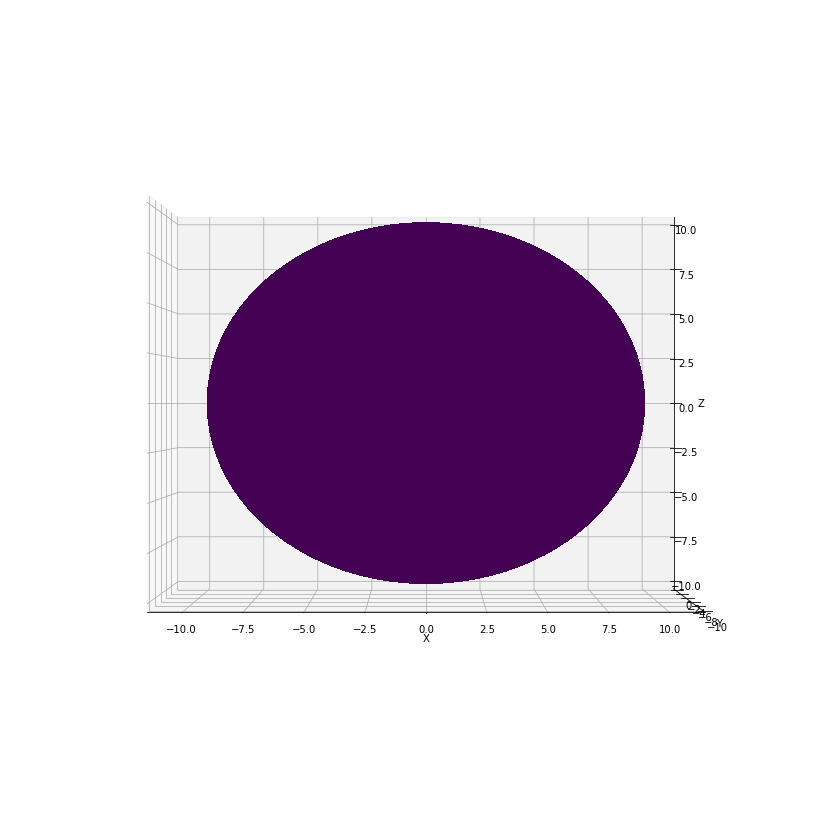

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1080x1080', '-pix_fmt', 'rgba', '-r', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'screen_input.mp4']' returned non-zero exit status 255.

In [28]:
# here is how to write screen_input.mp4
def update_plot(frame_number, screen, plot):
    plot[0].remove()
    C = screen[frame_number,:, :]
    scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
    C_colored = scalarMap.to_rgba(C)
    plot[0] = ax.plot_surface(x2, y2, z2, facecolors= C_colored, cmap='plasma',linewidth=0, antialiased=False)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
C = screen[0,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
plot = [ax.plot_surface(x2, y2, z2, facecolors= C_colored, cmap='plasma',linewidth=0, antialiased=False)]
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(azim=-90,  elev=0)


fps = 10
frn = 50
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(screen, plot), interval=1000/fps)

plt.show()
Writer = animation.writers['ffmpeg']
ani.save('screen_input.mp4', writer=Writer(fps=10))
ani.save('screen_input.gif', writer=PillowWriter(fps=10)) # have no idea why saving gif is so sloooow


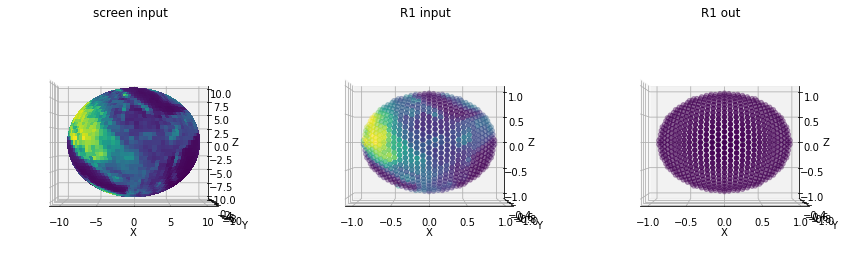

In [10]:
# now try to write 3 mp4 at the same time 3d version
def update_plot(frame_number, screen, R1_inputs, R1_outputs, plot):
    plot[0].remove()
    C = screen[frame_number,:, :]
    scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
    C_colored = scalarMap.to_rgba(C)
    plot[0] = ax_screen_input.plot_surface(x2, y2, z2, facecolors= C_colored, cmap='plasma',linewidth=0, antialiased=False)
    plot[1] = ax_R1_input.scatter3D(x1, y1,z1, c=R1_inputs[frame_number, :])
    plot[2] = ax_R1_output.scatter3D(x1, y1,z1, c=R1_outputs[frame_number, :])
    
    
fig = plt.figure(figsize=(15, 15))
# screen input
ax_screen_input = fig.add_subplot(1, 3, 1, projection='3d')
C = screen[0,:, :]
scalarMap = cm.ScalarMappable(norm=Normalize(vmin=C.min(), vmax=C.max()))
C_colored = scalarMap.to_rgba(C)
# R1 input & output
ax_R1_input = fig.add_subplot(1, 3, 2, projection='3d')
ax_R1_output = fig.add_subplot(1, 3, 3, projection='3d')

plot = [ax_screen_input.plot_surface(x2, y2, z2, facecolors= C_colored, cmap='plasma',linewidth=0, antialiased=False),
       ax_R1_input.scatter3D(x1, y1,z1, c=R1_inputs[0, :]),
       ax_R1_output.scatter3D(x1, y1,z1, c=R1_outputs[0, :])]

ax_screen_input.set_xlabel('X')
ax_screen_input.set_ylabel('Y')
ax_screen_input.set_zlabel('Z')
ax_screen_input.set_title('screen input')
ax_screen_input.view_init(azim=-90,  elev=0)
ax_R1_input.set_xlabel('X')
ax_R1_input.set_ylabel('Y')
ax_R1_input.set_zlabel('Z')
ax_R1_input.set_title('R1 input')
ax_R1_input.view_init(azim=-90,  elev=0)
ax_R1_output.set_xlabel('X')
ax_R1_output.set_ylabel('Y')
ax_R1_output.set_zlabel('Z')
ax_R1_output.set_title('R1 out')
ax_R1_output.view_init(azim=-90,  elev=0)


fps = 10
frn = 50
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(screen,R1_inputs, R1_outputs, plot), interval=1000/fps)

plt.show()
Writer = animation.writers['ffmpeg']
ani.save('dear_all.mp4', writer=Writer(fps=10))
ani.save('dear_all.gif', writer=PillowWriter(fps=10)) # have no idea why saving gif is so sloooow

In [6]:
#save_path = '/Users/wangqiuyang/Desktop/video'
frameSize = (800, 100)

out = cv.VideoWriter('screen_intput_video.mp4',cv.VideoWriter_fourcc(*'MJPG'), 5, frameSize, isColor=False )

for i in range(0,40):
    screen_frame = np.tile(screen[:, :, i], (3, 1, 1))
    screen_frame = np.swapaxes(screen_frame, 0, 2)
    screen_frame = np.swapaxes(screen_frame, 0, 1)
    #print(np.shape(screen_frame))
    img = screen_frame 
    img = screen[:, :, i]
    img = (img*255).astype(np.uint8)
    out.write(img)
    
out.release()


OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


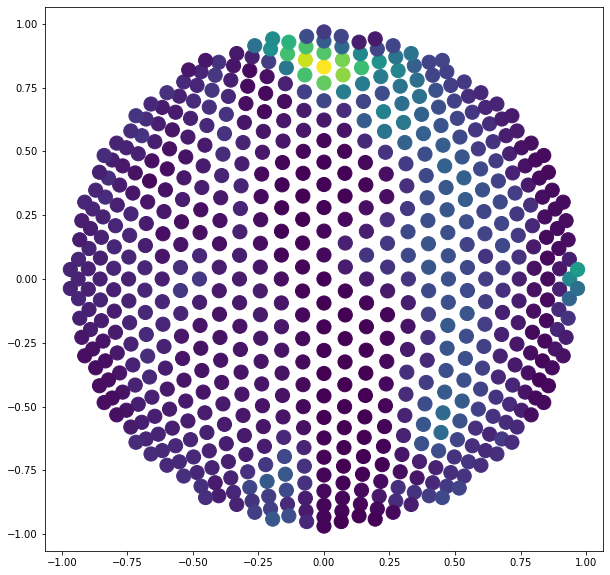

In [8]:
# R1
%matplotlib inline
#plt.figure(figsize=(20, 20))
 
fig, ax = plt.subplots(figsize=(10, 10))

#print(np.shape(R1_inputs[90, :]))
ax.scatter(x1,z1, c=R1_inputs[70, :], s=200)
#ax.plot_surface(x1, y1,z1, c=R1_inputs[40, :])
#plt.show()



/apps/miniconda/envs/ffbo/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


<Figure size 2160x2160 with 0 Axes>

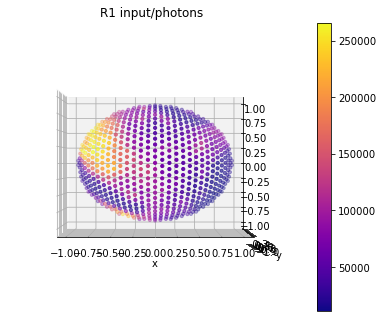

In [24]:
%matplotlib inline
plt.figure(figsize=(30, 30))
fig = plt.figure()
ax = Axes3D(fig)
#print(np.shape(R1_inputs[1, :]))
p = ax.scatter3D(x1,y1,z1, c=R1_inputs[20, :], s=10, cmap='plasma')
ax.view_init(azim=-90,  elev=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('R1 input/photons')
#plt.zlabel('z')
fig.colorbar(p)

plt.show()

In [2]:


def just_a_test(i):
    plt.figure(figsize=(30, 30))
    fig = plt.figure()
    ax = Axes3D(fig)
    #print(np.shape(R1_inputs[1, :]))
    p = ax.scatter3D(x1,y1,z1, c=R1_inputs[20, :], s=10, cmap='plasma')
    ax.view_init(azim=-90,  elev=0)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('R1 input/photons')
    #plt.zlabel('z')
    fig.colorbar(p)

    plt.show()
    
#for i in range(200):
    #print(i)
    #just_a_test(i)
    

(400, 611)


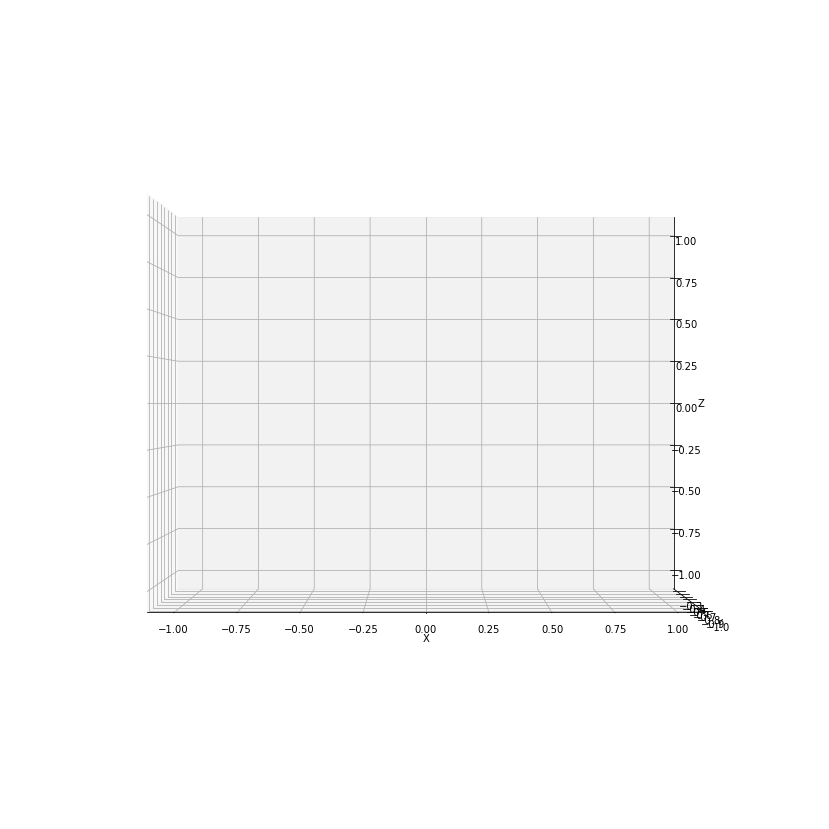

In [7]:

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter3D(x1, y1, z1, c=[], s=15, cmap='plasma')
#plt.colorbar(sc)

def update(num):
    sc.set_array(data[num, :])
    #fig.colorbar(sc, ax=ax)
    return sc
    

N = np.shape(R1_inputs)[0]
data = R1_inputs
print(np.shape(data))
#graph = ax.scatterD(x1, y1, z1, c=data[0, :])

# Setting the axes properties
#ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

#ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

#ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')
ax.view_init(azim=-90,  elev=0)

ani = animation.FuncAnimation(fig, update, N, interval=100, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()
Writer = animation.writers['ffmpeg']
ani.save('R1_input.mp4', writer=Writer(fps=50))
ani.save('R1_input.gif', writer=PillowWriter(fps=50)) # have no idea why saving gif is so sloooow

In [29]:
# hey!
output_color_axis = [np.min(outputs[:, 150:-1]), np.max(outputs[:, 150:-1])]
screen = np.max(h5py.File('intensities.h5', 'r')['array'], 0)
print(output_color_axis)
print(screen)

[-81.99051378764534, -5.359791487551206]
[[  3000.   3000.   3000. ... 300000. 300000. 300000.]
 [  3000.   3000.   3000. ... 300000. 300000. 300000.]
 [  3000.   3000.   3000. ... 300000. 300000. 300000.]
 ...
 [  3000.   3000.   3000. ... 300000. 300000. 300000.]
 [  3000.   3000.   3000. ... 300000. 300000. 300000.]
 [  3000.   3000.   3000. ... 300000. 300000. 300000.]]


In [30]:
# setup color axis, and now it's useful
boxbg = np.array([1, 1, 1]) * 0.9569
weight = 10
screen_color_axis = [0, np.max(screen)]
screen_color_axis_gc = [np.min(np.log10(screen[:])), np.max(np.log10(screen[:]))]

input_color_axis = [0, np.max(R1_inputs)]
input_color_axis_gc = [np.min(np.log10(R1_inputs[:])), np.max(np.log10(R1_inputs[:]))]

output_color_axis = [np.min(R1_outputs[:]), np.max(R1_outputs[:])]
#output_color_axis_gc = [np.min(R1_outputs[:]), np.log10(R1_outputs[:])]

print(f'input_color_axis is 10^{input_color_axis_gc}')
print(f'output_color_axis is {output_color_axis} mV')

input_color_axis is 10^[3.4767053248157405, 5.47754326764243]
output_color_axis is [-81.99048501812521, -5.408338446695392] mV


/apps/miniconda/envs/ffbo/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 3600x3600 with 0 Axes>

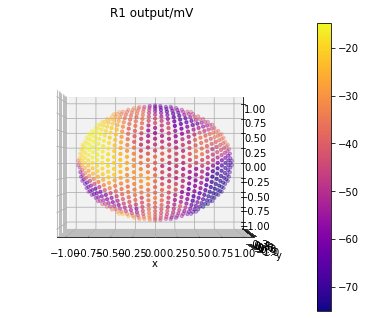

In [41]:

plt.figure(figsize=(50, 50))
fig = plt.figure()
ax = Axes3D(fig)
#print(np.shape(R1_inputs[1, :]))
p = ax.scatter3D(x1,y1,z1, c=R1_outputs[50, :], s=10, cmap='plasma')
ax.view_init(azim=-90,  elev=0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('R1 output/mV')
#plt.zlabel('z')
fig.colorbar(p)

plt.show()

200


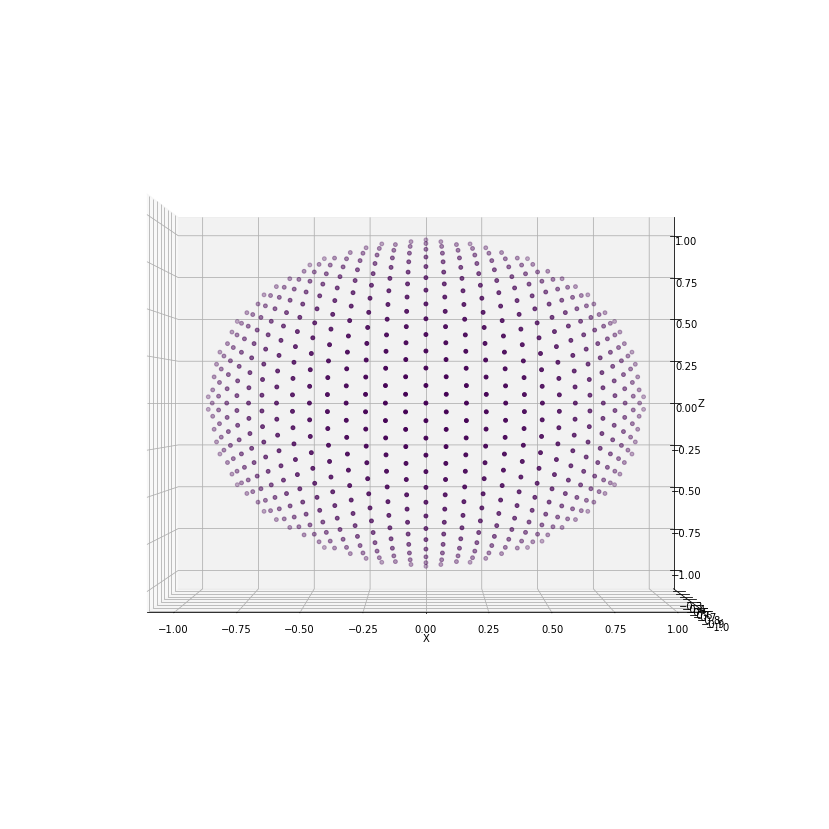

In [17]:

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter3D(x1, y1, z1, c=[], s=15, cmap='plasma')
#plt.colorbar(sc)

def update(num):
    sc.set_array(data1[num, :])
    #fig.colorbar(sc, ax=ax)
    return sc
    

N = np.shape(R1_outputs)[0]
data1 = R1_outputs
print(N)
#graph = ax.scatterD(x1, y1, z1, c=data[0, :])

# Setting the axes properties
#ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

#ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

#ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')
#ax.view_init(azim=-65,  elev=35)
ax.view_init(azim=-90,  elev=0)

ani = animation.FuncAnimation(fig, update, N, interval=100, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
#plt.show()
Writer = animation.writers['ffmpeg']
ani.save('R1_outputs.mp4', writer=Writer(fps=50))
ani.save('R1_outputs.gif', writer=PillowWriter(fps=50)) # have no idea why saving gif is so sloooow

(200, 611)


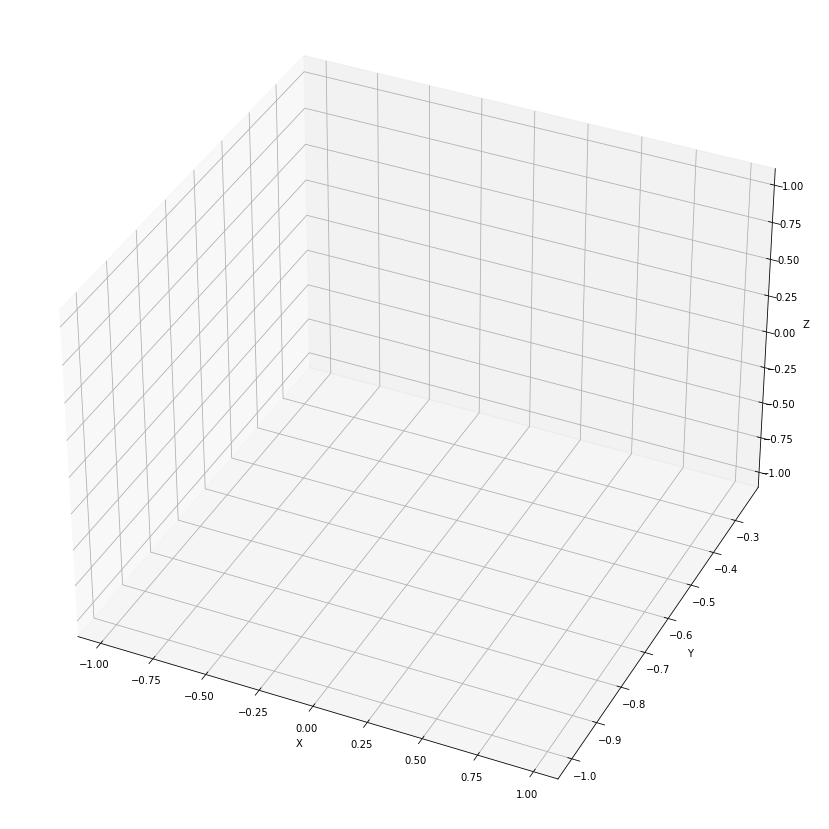

[-81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99 -81.99
 -81.9

In [22]:
# wtf?
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter3D(x1, y1, z1, c=[], s=15, cmap='plasma')
#plt.colorbar(sc)

def update(num):
    sc.set_array(data[num, :])
    #fig.colorbar(sc, ax=ax)
    #print(data[num, :])
    return sc
    

N = np.shape(R1_outputs)[0]
data = R1_outputs
print(np.shape(data))
#graph = ax.scatterD(x1, y1, z1, c=data[0, :])

# Setting the axes properties
#ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

#ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

#ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')
ax.view_init(azim=-65,  elev=35)

ani = animation.FuncAnimation(fig, update, N, interval=100, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()
Writer = animation.writers['ffmpeg']
ani.save('R1_output.mp4', writer=Writer(fps=50))
ani.save('R1_output.gif', writer=PillowWriter(fps=50)) # have no idea why saving gif is so sloooow

In [37]:
# what the fuck?
hey = np.min(outputs[:, 200:-1])
print(hey)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()